## Student Performance Indicator


#### Life cycle of Machine learning Project

- Understanding the Problem Statement
- Data Collection
- Data Checks to perform
- Exploratory data analysis
- Data Pre-Processing
- Model Training
- Choose best model

### 1) Problem statement
- This project understands how the student's performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test preparation course.


### 2) Data Collection
- Dataset Source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977
- The data consists of 8 column and 1000 rows.

### 2.1 Import Data and Required Packages
####  Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action='ignore')

In [4]:
#importing csv data as Panda Dataframe
df=pd.read_csv(r"data/stud.csv")

In [5]:
#Top 5 records of data
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [6]:
#shape of dataset
df.shape

(1000, 8)

In [7]:
#dataset Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


### 2.2 Dataset information
- gender : sex of students  -> (Male/female)
- race/ethnicity : ethnicity of students -> (Group A, B,C, D,E)
- parental level of education : parents' final education ->(bachelor's degree,some college,master's degree,associate's degree,high school)
- lunch : having lunch before test (standard or free/reduced) 
- test preparation course : complete or not complete before test
- math score
- reading score
- writing score

### 3. Data Checks to perform

- Check Missing values
- Check Duplicates
- Check data type
- Check the number of unique values of each column
- Check statistics of data set
- Check various categories present in the different categorical column

In [8]:
#checking missing value
df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

There is no missing value in dataset

In [9]:
#checking duplicates
df.duplicated().sum()

0

There is no duplicate values in the dataset

In [10]:
#check the datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [11]:
#number of unique value of each column
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [12]:
#check statistics of dataset
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


Exploring data

In [13]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [14]:
for col in df.select_dtypes(include='object').columns:
    print(f"Category in {col} variable : ",end=" ")
    print(df[col].unique())


Category in gender variable :  ['female' 'male']
Category in race_ethnicity variable :  ['group B' 'group C' 'group A' 'group D' 'group E']
Category in parental_level_of_education variable :  ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Category in lunch variable :  ['standard' 'free/reduced']
Category in test_preparation_course variable :  ['none' 'completed']


In [15]:
#defining numerical and categorical columns
numerical_features=df.select_dtypes(exclude='object').columns
categorical_features=[col for col in df.columns if df[col].dtype=='O']

In [16]:
#print columns
print('we have {} numerical features : {}'.format(len(numerical_features),list(numerical_features)))
print('we have {} numerical features : {}'.format(len(categorical_features),list(categorical_features)))

we have 3 numerical features : ['math_score', 'reading_score', 'writing_score']
we have 5 numerical features : ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


In [17]:
df.head(2)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88


Adding column for Total scoer and Average

In [18]:
df['Total_score']=df['math_score']+df['reading_score']+df['writing_score']
df['Average']=(df['Total_score']/3).round(2)

In [19]:
df.head(2)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,Total_score,Average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.67
1,female,group C,some college,standard,completed,69,90,88,247,82.33


In [20]:
#students with full marks in different subject
math_full_marks=df[df['math_score']==100]['Average'].count()
writing_score_full_marks=df[df['writing_score']==100]['Average'].count()
reading_score_full_marks=df[df['reading_score']==100]['Average'].count()

In [21]:
print(f"Number of student with full marks in maths : {math_full_marks}")
print(f"Number of student with full marks in writing : {writing_score_full_marks}")
print(f"Number of student with full marks in reading : {reading_score_full_marks}")

Number of student with full marks in maths : 7
Number of student with full marks in writing : 14
Number of student with full marks in reading : 17


In [22]:
#students with full marks in different subject
math_less_20=df[df['math_score']<=20]['Average'].count()
writing_less_20=df[df['writing_score']<=20]['Average'].count()
reading_less_20=df[df['reading_score']<=20]['Average'].count()

In [23]:
print(f"Number of student with less than 20 marks in maths : {math_less_20}")
print(f"Number of student with less than 20 marks in writing : {writing_less_20}")
print(f"Number of student with less than 20 marks in reading : {reading_less_20}")

Number of student with less than 20 marks in maths : 4
Number of student with less than 20 marks in writing : 3
Number of student with less than 20 marks in reading : 1


Insight:
-  Students are poor in maths
-  Students are best in reading_skills


### 4. Exploring Data ( Visualization )
#### 4.1 Visualize average score distribution to make some conclusion. 
- Histogram
- Kernel Distribution Function (KDE)

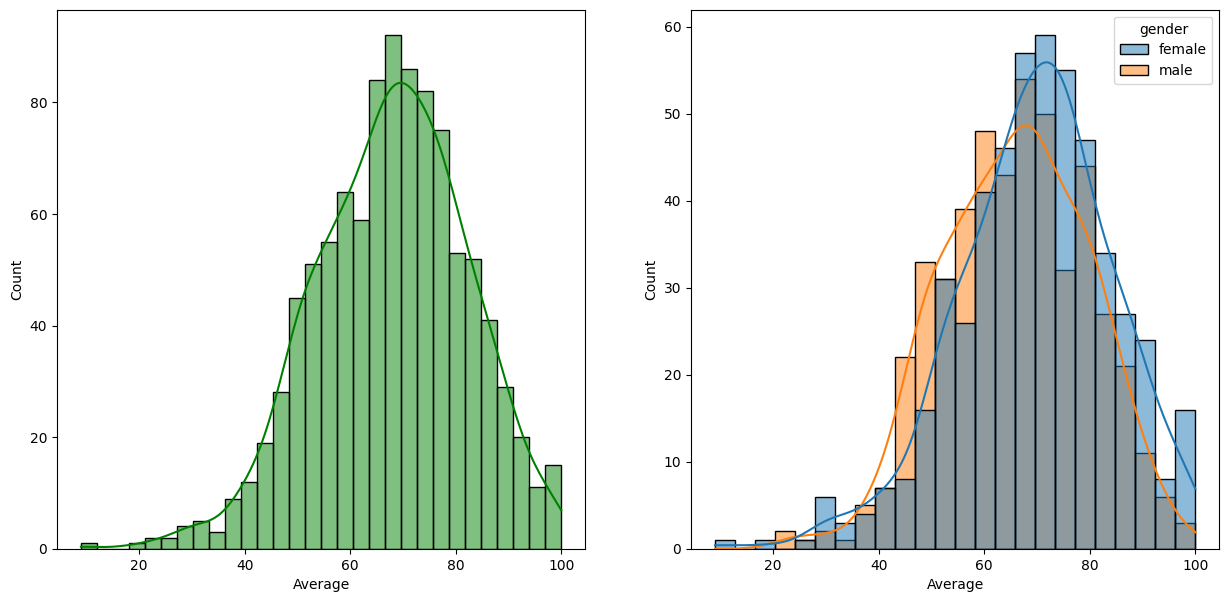

In [24]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='Average',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='Average',kde=True,hue='gender')
plt.show()

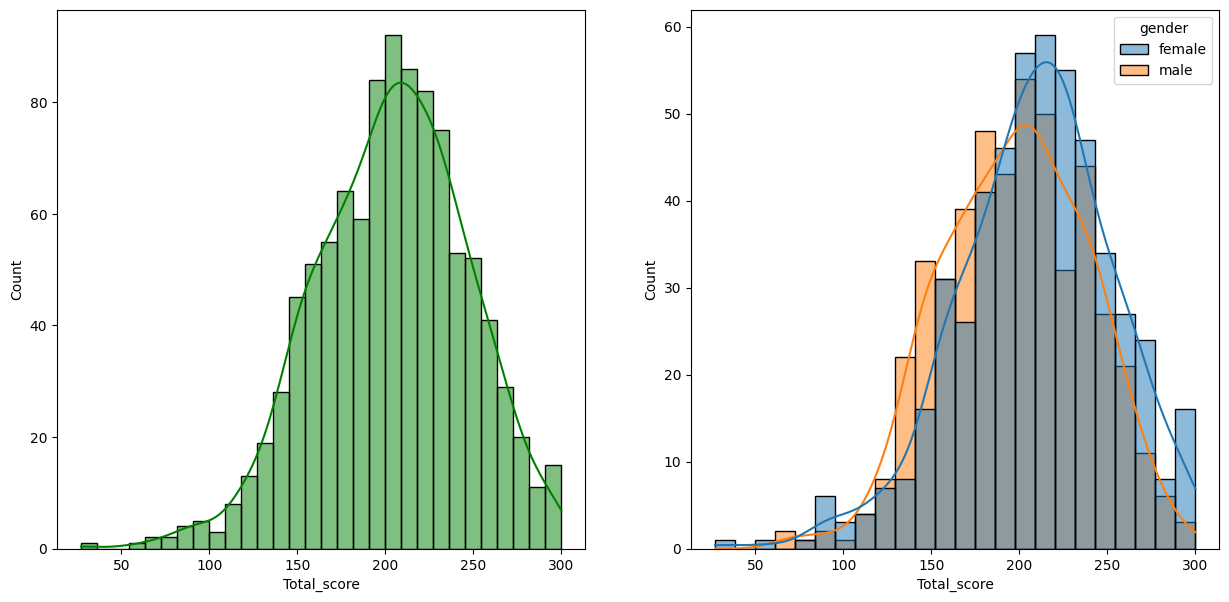

In [25]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='Total_score',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='Total_score',kde=True,hue='gender')
plt.show()

Insights:
-   Female Student perform well than male student

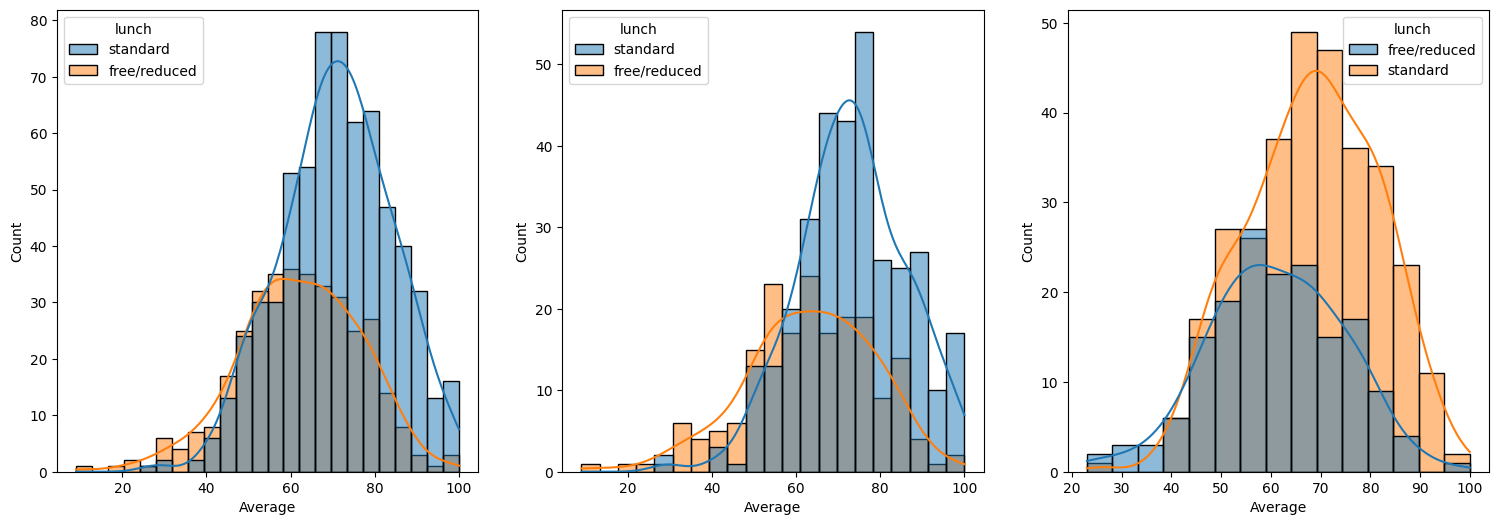

In [26]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='Average',kde=True,hue='lunch')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='Average',kde=True,hue='lunch')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='Average',kde=True,hue='lunch')
plt.show()

Insights:
- man as well as female Student perform well in exam in case of Standard lunch

<Axes: xlabel='Average', ylabel='Count'>

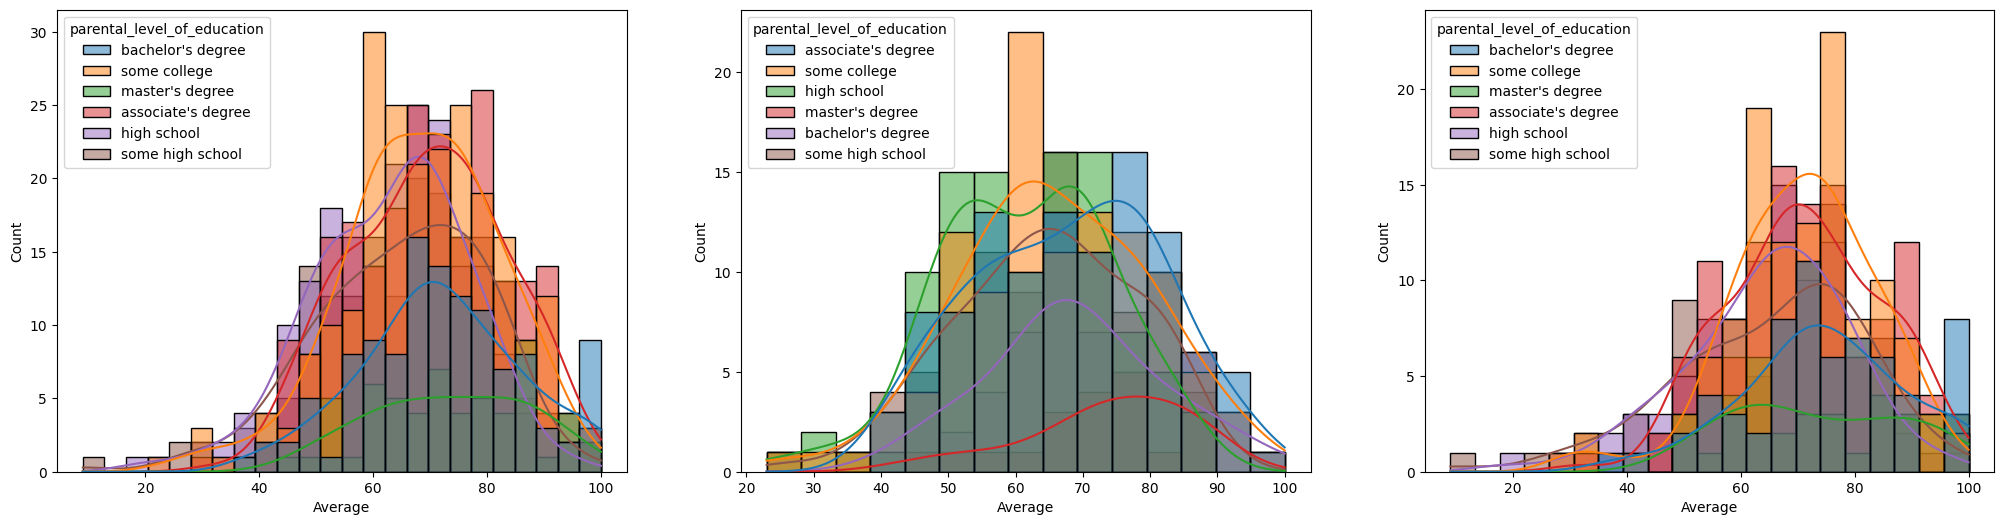

In [27]:
plt.subplots(1,5,figsize=(25,6))
plt.subplot(1,3,1)
sns.histplot(data=df,x='Average',hue='parental_level_of_education',kde=True)
plt.subplot(132)
sns.histplot(data=df[df['gender']=='male'],x='Average',hue='parental_level_of_education',kde=True)
plt.subplot(133)
sns.histplot(data=df[df['gender']=='female'],x='Average',hue='parental_level_of_education',kde=True)


In [28]:
df.columns

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score', 'Total_score', 'Average'],
      dtype='object')

<Axes: xlabel='Average', ylabel='Count'>

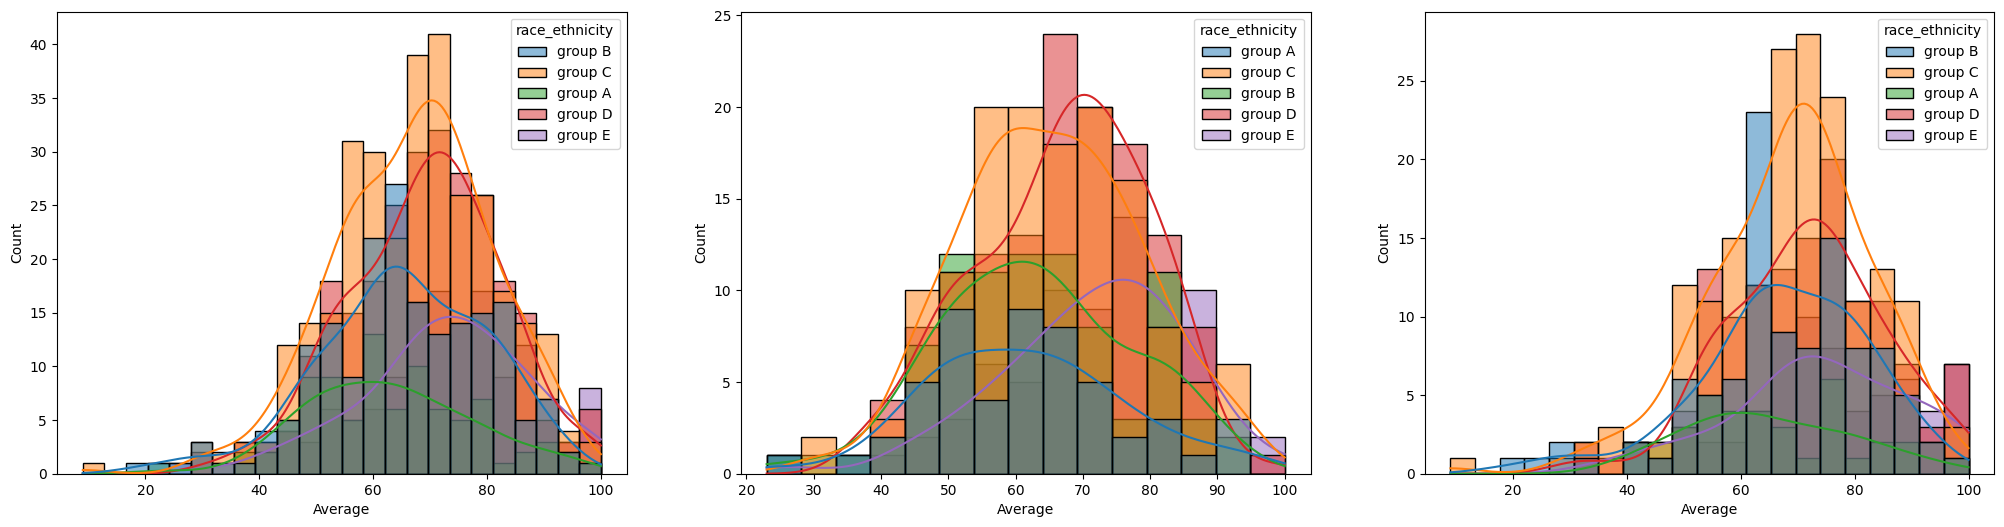

In [29]:
plt.subplots(1,5,figsize=(25,6))
plt.subplot(1,3,1)
sns.histplot(data=df,x='Average',hue='race_ethnicity',kde=True)
plt.subplot(132)
sns.histplot(data=df[df['gender']=='male'],x='Average',hue='race_ethnicity',kde=True)
plt.subplot(133)
sns.histplot(data=df[df['gender']=='female'],x='Average',hue='race_ethnicity',kde=True)


Insights:
- Students having group A and E perform poorly in Exma errespective of whther they are malke or female

Maximum marks of student in all three subject 

<Axes: title={'center': 'Writing scores'}, ylabel='writing_score'>

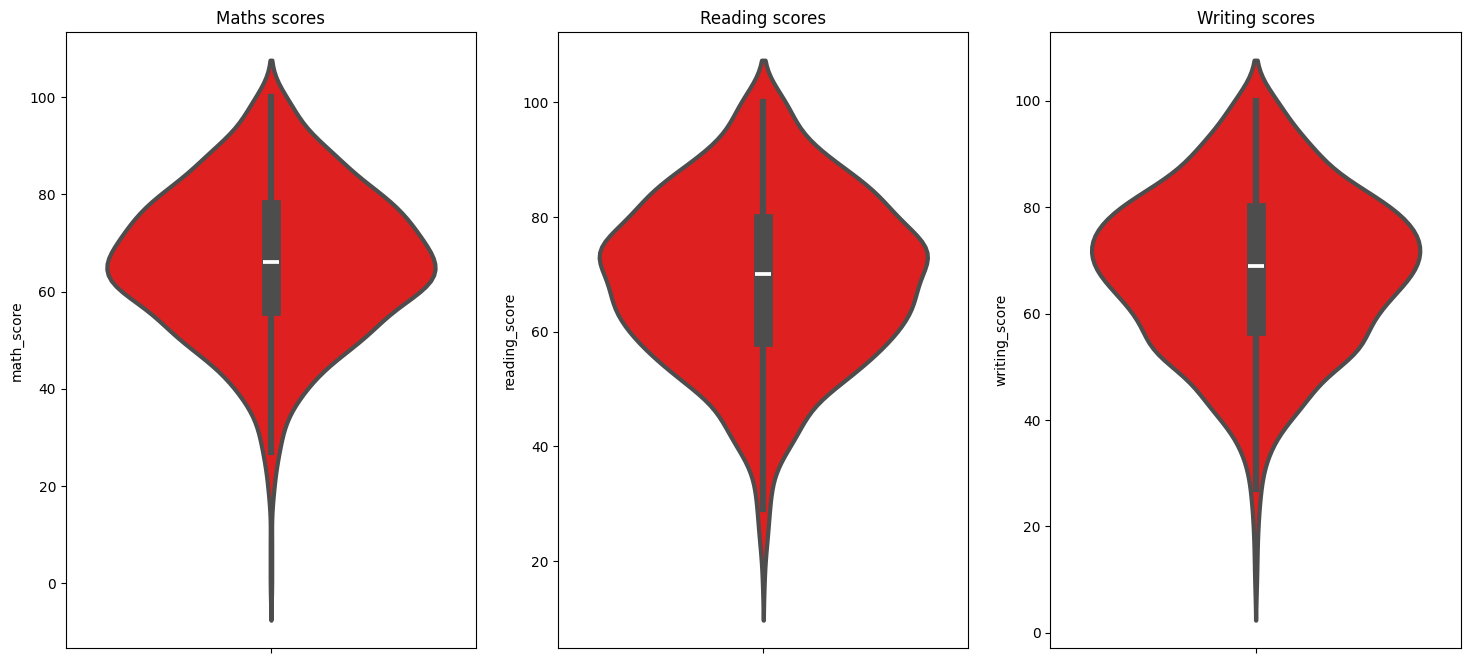

In [30]:
plt.figure(figsize=(18,8))
plt.subplot(131)
plt.title("Maths scores")
sns.violinplot(data=df,y='math_score',color='red',linewidth=3)
plt.subplot(132)
plt.title("Reading scores")
sns.violinplot(data=df,y='reading_score',color='red',linewidth=3)
plt.subplot(133)
plt.title("Writing scores")
sns.violinplot(data=df,y='writing_score',color='red',linewidth=3)

INsights:
- in Maths:- Most student's marks lie between 60-80 
- in reading and writing :- Most student's marks lie between 50-80 

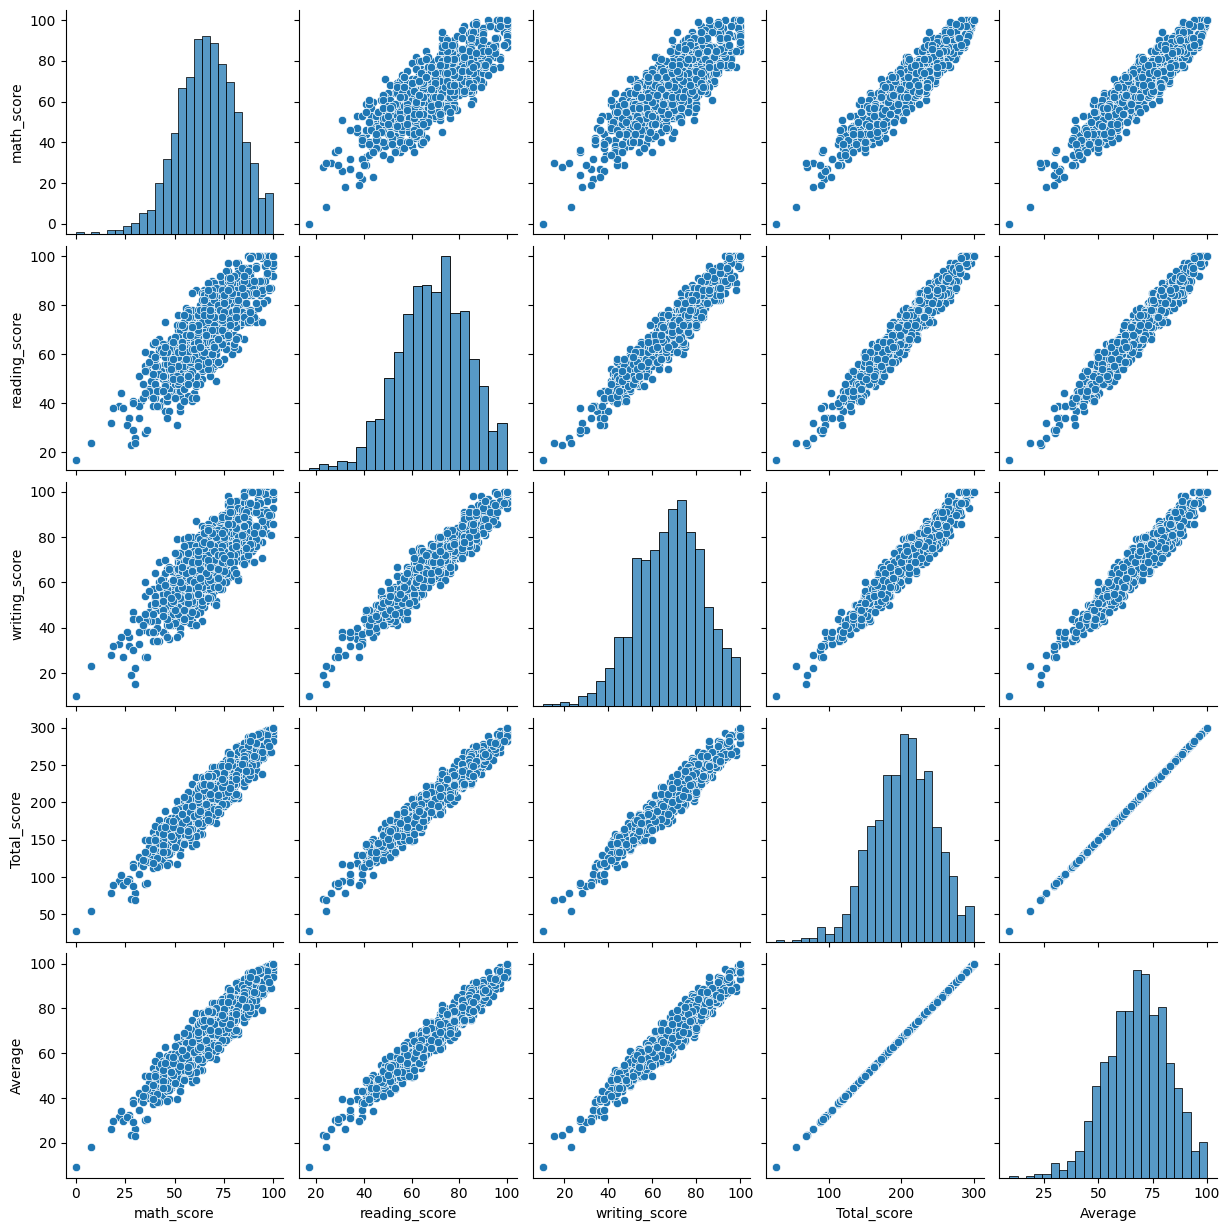

In [31]:
sns.pairplot(df)

In [32]:
df.columns

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score', 'Total_score', 'Average'],
      dtype='object')

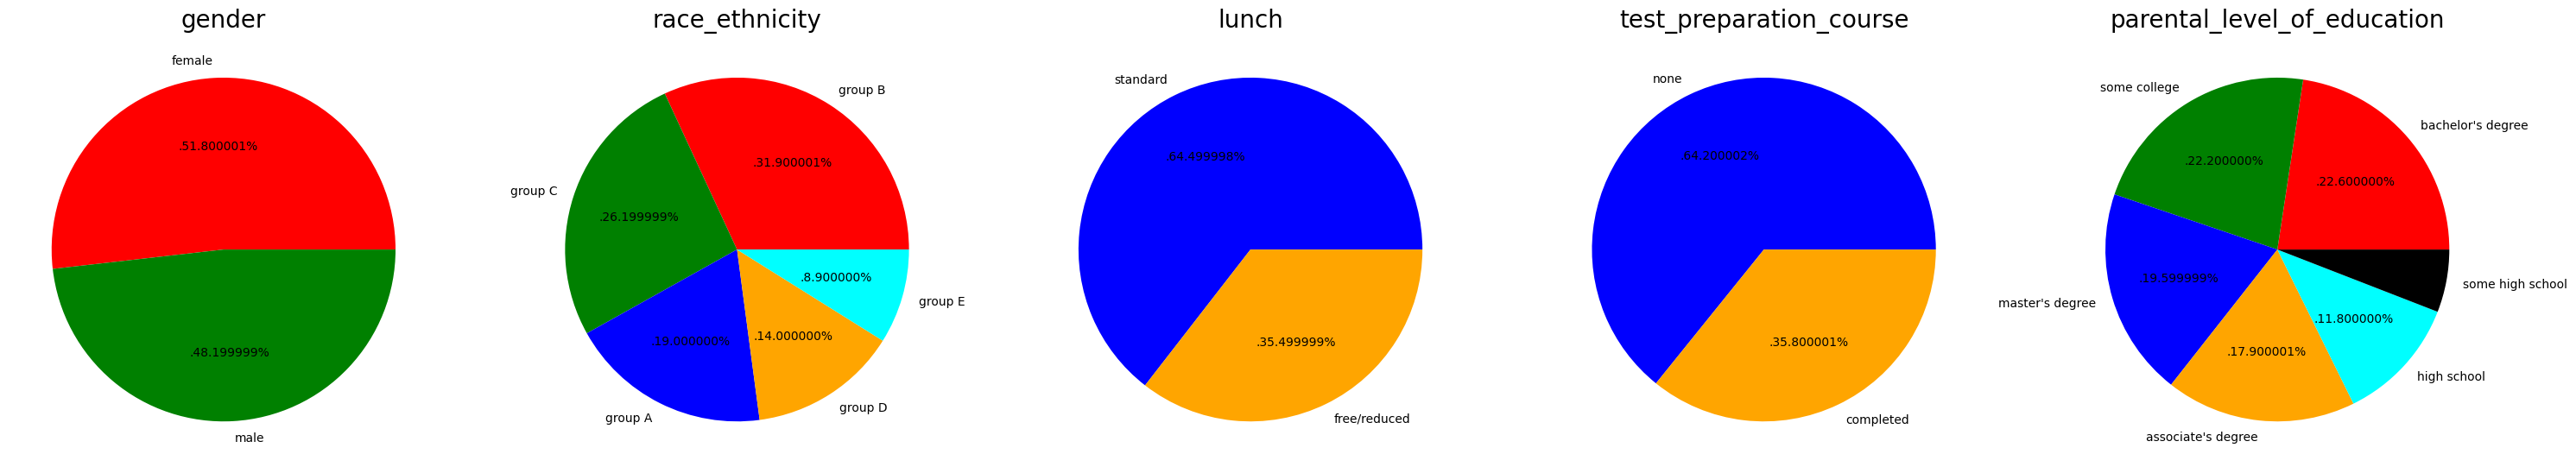

In [33]:
plt.rcParams['figure.figsize']=(30,12)

plt.subplot(1,5,1)
size=df['gender'].value_counts()
# print(size)
labels=df['gender'].unique()
color=['red','green']
plt.title('gender',fontsize=20)
plt.pie(size,colors=color,labels=labels,autopct='.%2f%%')


plt.subplot(1,5,2)
size=df['race_ethnicity'].value_counts()
# print(size)
labels=df['race_ethnicity'].unique()
color=['red','green','blue','orange','cyan']
plt.title('race_ethnicity',fontsize=20)
plt.pie(size,colors=color,labels=labels,autopct='.%2f%%')


plt.subplot(1,5,3)
size=df['lunch'].value_counts()
# print(size)
labels=df['lunch'].value_counts().index
color=['blue','orange','cyan']
plt.title('lunch',fontsize=20)
plt.pie(size,colors=color,labels=labels,autopct='.%2f%%')
plt.axis('off')


plt.subplot(1,5,4)
size=df['test_preparation_course'].value_counts()
# print(size)
labels=df['test_preparation_course'].unique()
color=['blue','orange','cyan']
plt.title('test_preparation_course',fontsize=20)
plt.pie(size,colors=color,labels=labels,autopct='.%2f%%')
plt.axis('off')


plt.subplot(1,5,5)
size=df['parental_level_of_education'].value_counts()
# print(size)
labels=df['parental_level_of_education'].unique()
color=['red','green','blue','orange','cyan',"black"]
plt.title('parental_level_of_education',fontsize=20)
plt.pie(size,colors=color,labels=labels,autopct='.%2f%%')
plt.axis('off')

plt.tight_layout()
plt.grid()
plt.show()

Inisghts:
- number of male and female are almost same
- number of student in group B is maximum
- NUmber of student who have standard lunch are greater
- NUmber of Student who have not enrolled in any test preperation course is greater
- NUmber of student whose parental eduction is "some college" is greater followed closely by "bachelors degree"

#### 4.4 Feature Wise Visualization
#### 4.4.1 GENDER COLUMN
- How is distribution of Gender ?
- Is gender has any impact on student's performance ?

#### UNIVARIATE ANALYSIS ( How is distribution of Gender ? )

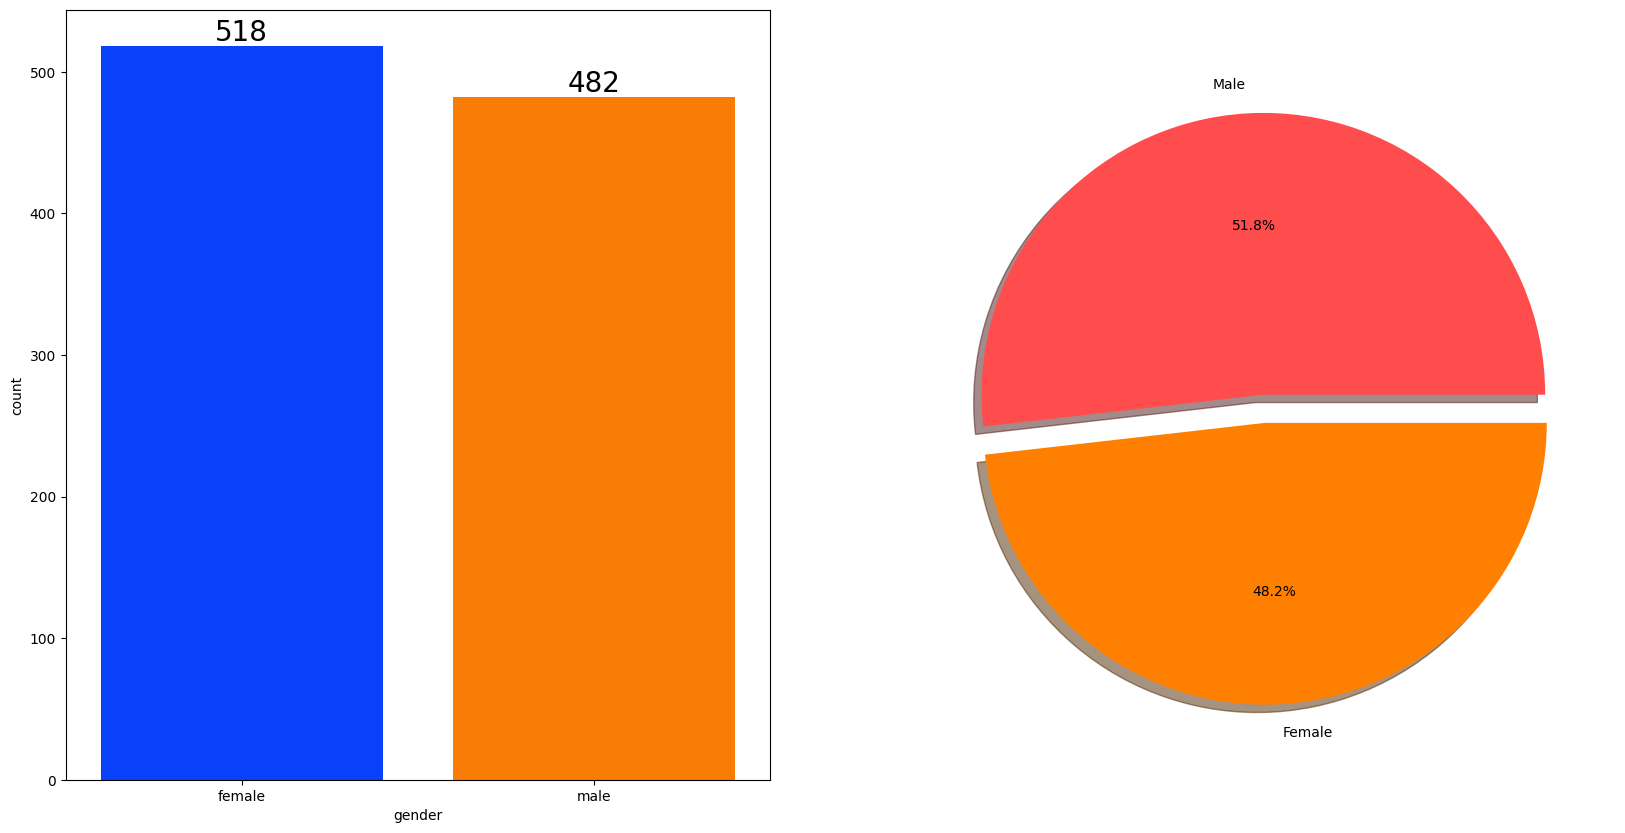

In [34]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['gender'],data=df,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x=df['gender'].value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()

#### Insights 
- Gender has balanced data with female students are 518 (52%) and male students are 482 (48%) 

#### BIVARIATE ANALYSIS ( Is gender has any impact on student's performance ? ) 

In [35]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,Total_score,Average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.67
1,female,group C,some college,standard,completed,69,90,88,247,82.33
2,female,group B,master's degree,standard,none,90,95,93,278,92.67
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.33
4,male,group C,some college,standard,none,76,78,75,229,76.33


In [36]:
# gender_group = df.groupby('gender')


In [37]:
# plt.figure(figsize=(10, 8))

# X = ['Total Average','Math Average']


# female_scores = [gender_group['Average'][0], gender_group['math_score'][0]]
# male_scores = [gender_group['Average'][1], gender_group['math_score'][1]]

# X_axis = np.arange(len(X))
  
# plt.bar(X_axis - 0.2, male_scores, 0.4, label = 'Male')
# plt.bar(X_axis + 0.2, female_scores, 0.4, label = 'Female')
  
# plt.xticks(X_axis, X)
# plt.ylabel("Marks")
# plt.title("Total average v/s Math average marks of both the genders", fontweight='bold')
# plt.legend()
# plt.show()

#### 4.4.2 RACE/EHNICITY COLUMN
- How is Group wise distribution ?
- Is Race/Ehnicity has any impact on student's performance ?

#### UNIVARIATE ANALYSIS ( How is Group wise distribution ?)

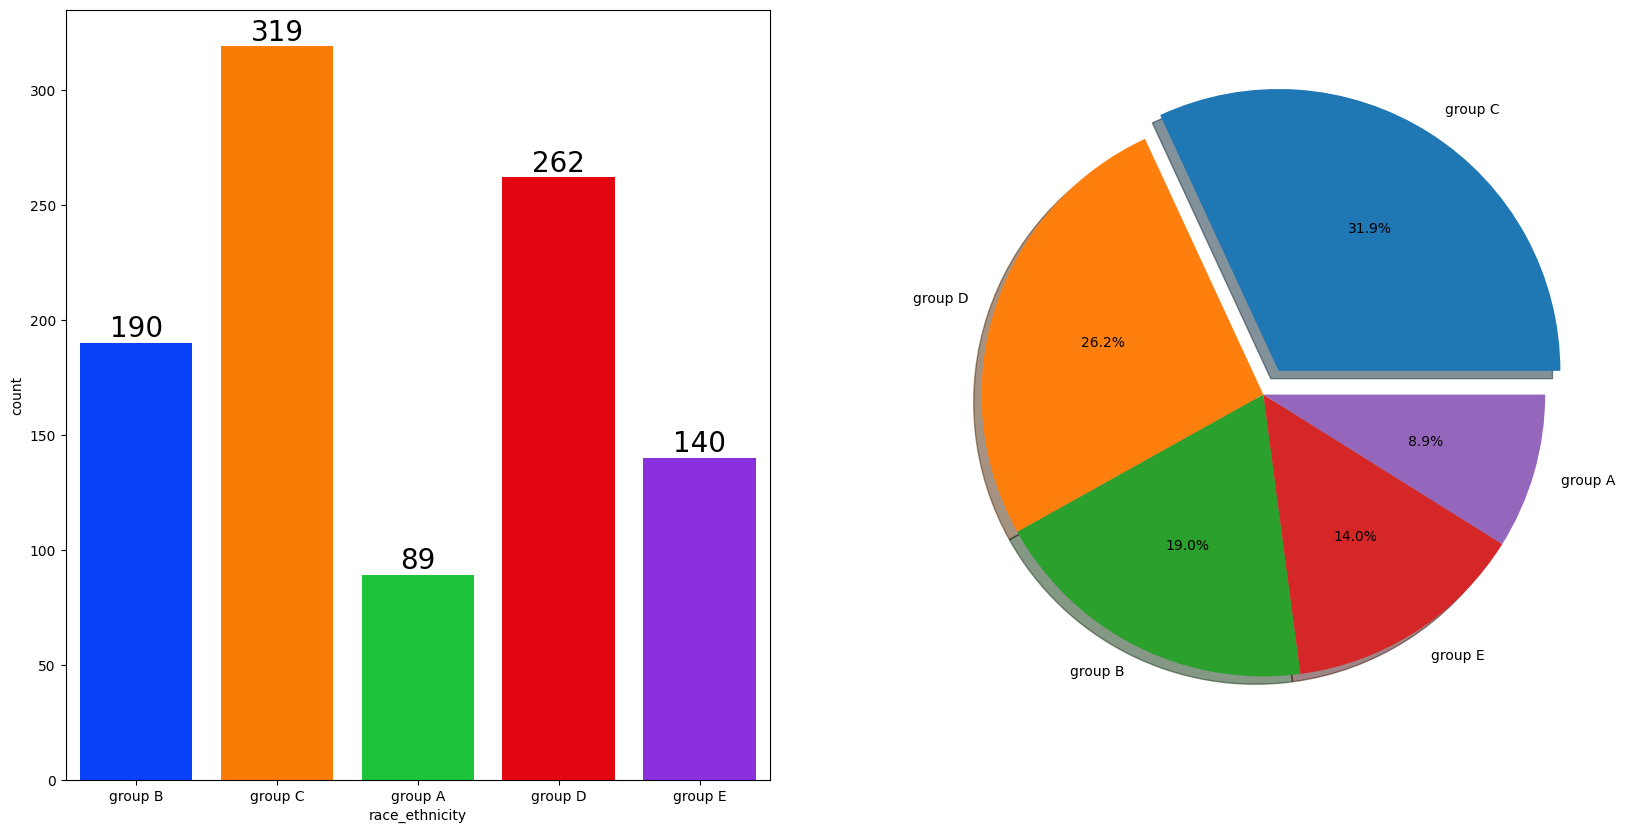

In [38]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['race_ethnicity'],data=df,palette='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
plt.pie(x=df['race_ethnicity'].value_counts(),labels=df['race_ethnicity'].value_counts().index,explode=[0.1,0,0,0,0],shadow=True,autopct='%1.1f%%')
plt.show()

In [39]:
# # to verify only
# f,ax=plt.subplots(1,2,figsize=(20,10))
# sns.barplot(x=df['race_ethnicity'].value_counts().index,y=df['race_ethnicity'].value_counts().values,palette='bright',ax=ax[0],saturation=0.95)
# for container in ax[0].containers:
#     ax[0].bar_label(container,color='black',size=20)
# plt.pie(x=df['race_ethnicity'].value_counts(),labels=df['race_ethnicity'].value_counts().index,explode=[0.1,0,0,0,0],shadow=True,autopct='%1.1f%%')
# plt.show()

#### Insights 
- Most of the student belonging from group C /group D.
- Lowest number of students belong to groupA.

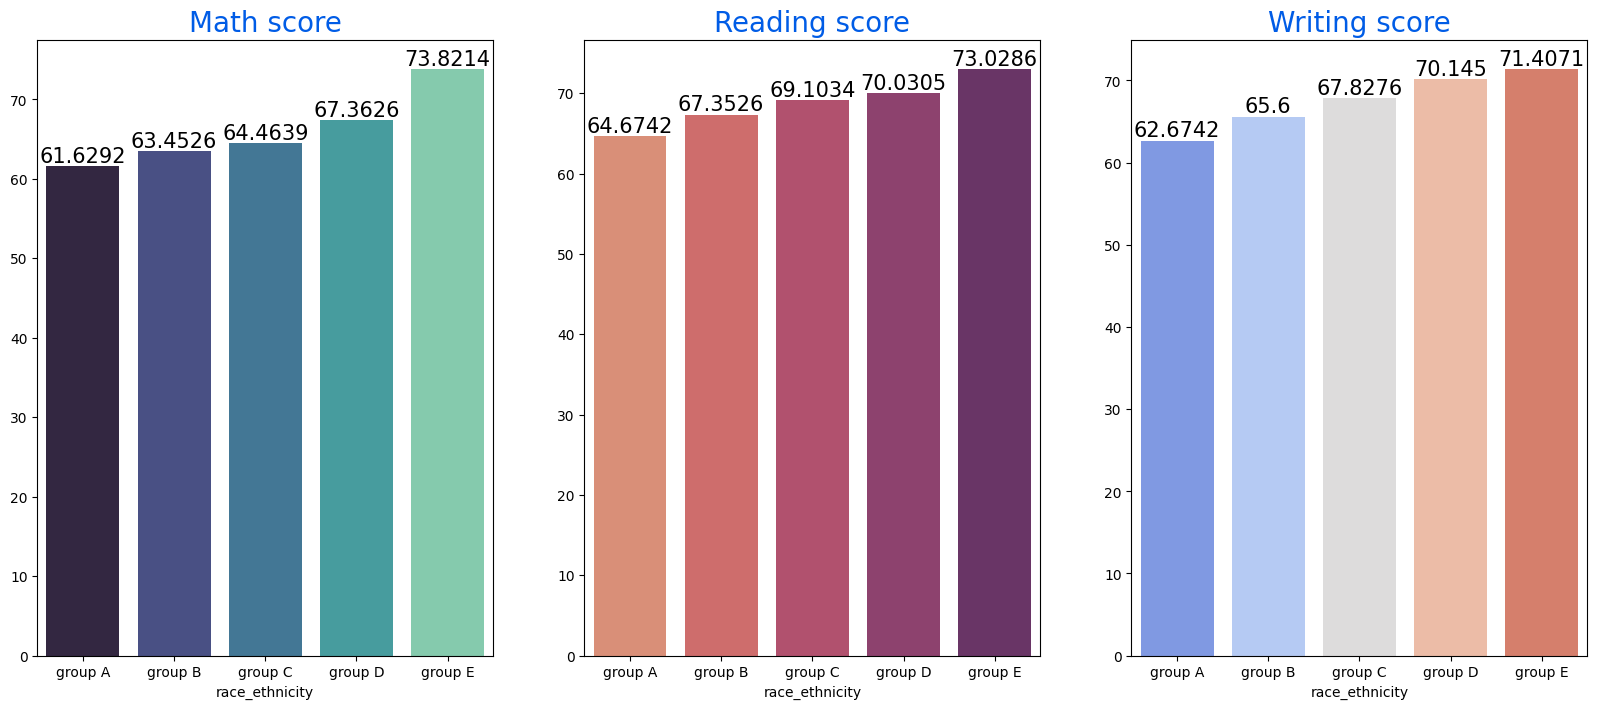

In [40]:
Group_data2=df.groupby('race_ethnicity')
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.barplot(x=Group_data2['math_score'].mean().index,y=Group_data2['math_score'].mean().values,palette = 'mako',ax=ax[0])
ax[0].set_title('Math score',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['reading_score'].mean().index,y=Group_data2['reading_score'].mean().values,palette = 'flare',ax=ax[1])
ax[1].set_title('Reading score',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['writing_score'].mean().index,y=Group_data2['writing_score'].mean().values,palette = 'coolwarm',ax=ax[2])
ax[2].set_title('Writing score',color='#005ce6',size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)

#### Insights 
- Group E students have scored the highest marks. 
- Group A students have scored the lowest marks. 
- Students from a lower Socioeconomic status have a lower avg in all course subjects

#### 4.4.3 PARENTAL LEVEL OF EDUCATION COLUMN
- What is educational background of student's parent ?
- Is parental education has any impact on student's performance ?

#### UNIVARIATE ANALYSIS ( What is educational background of student's parent ? )

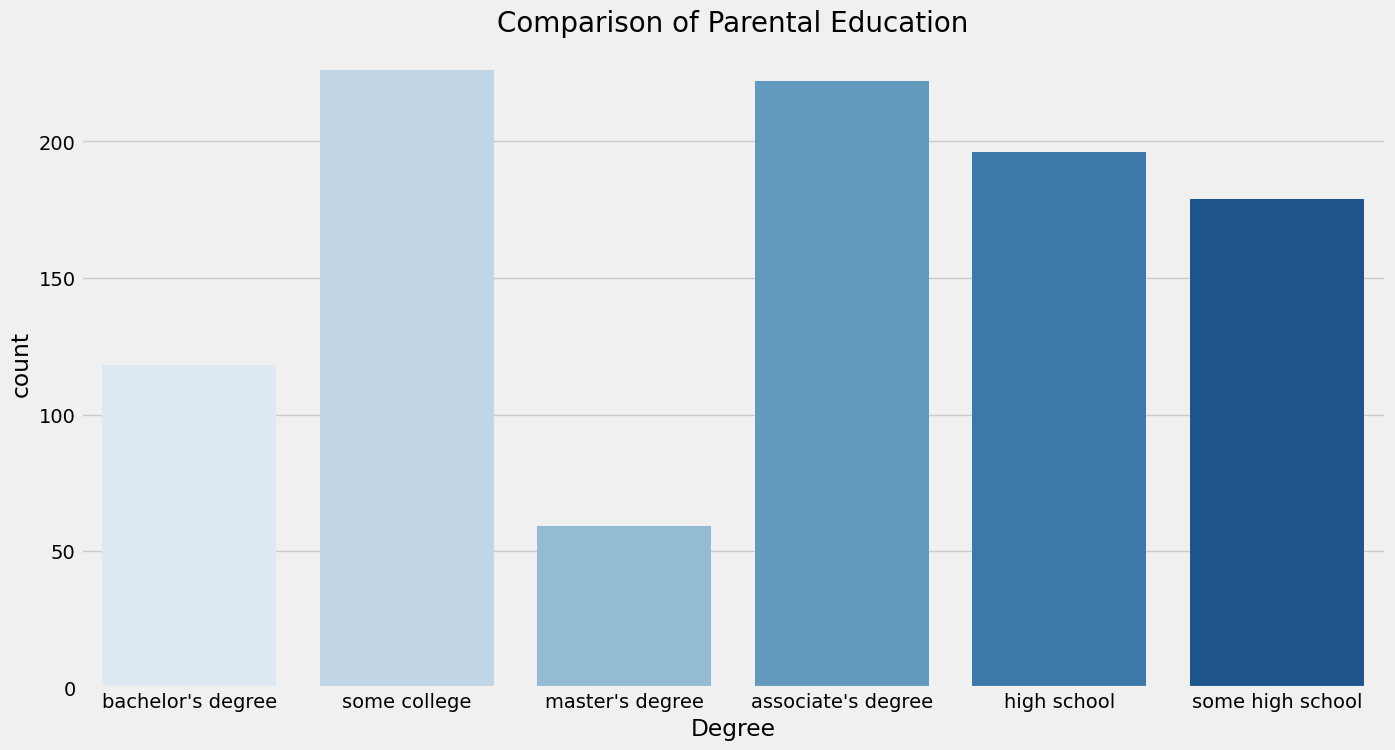

In [41]:
plt.rcParams['figure.figsize'] = (15, 8)
plt.style.use('fivethirtyeight')
sns.countplot(x=df['parental_level_of_education'],data=df,palette='Blues')
plt.xlabel('Degree')
plt.ylabel('count')
plt.title('Comparison of Parental Education', fontweight = 30, fontsize = 20)
plt.show()

Insights:
- largest number of parents are from 'some college'

#### BIVARIATE ANALYSIS ( Is parental education has any impact on student's performance ? )

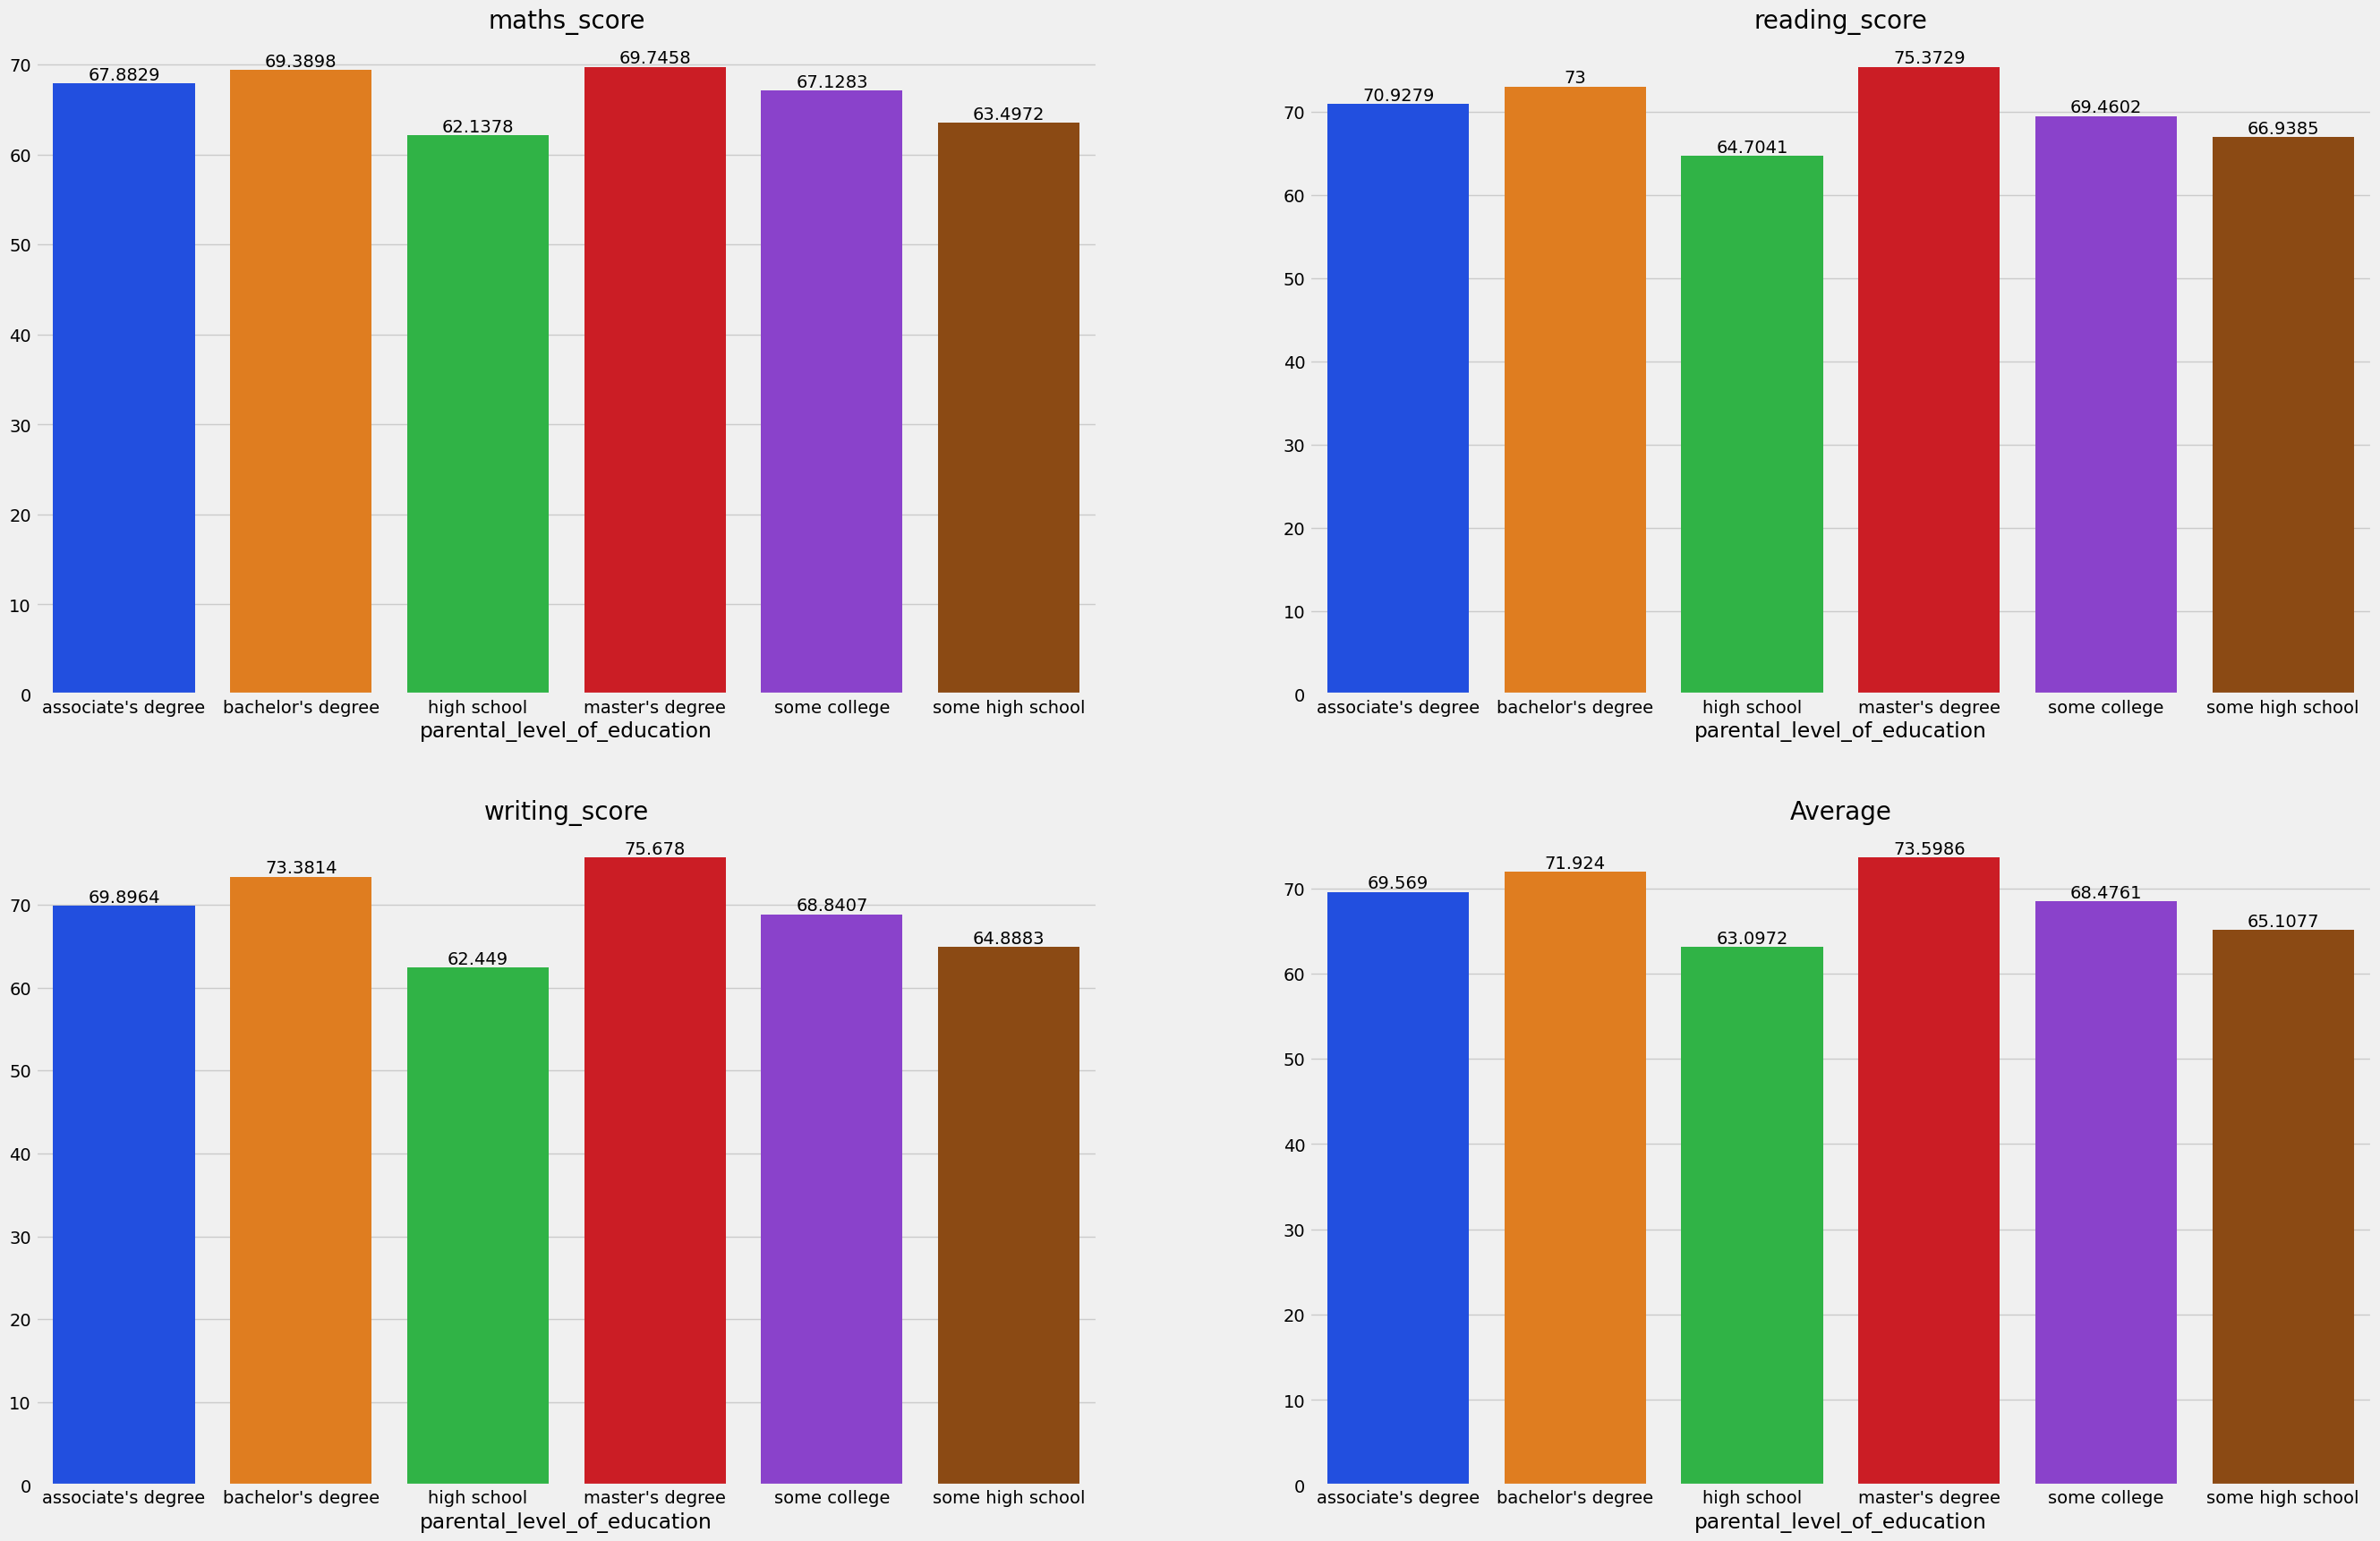

In [42]:
groupedParent=df.groupby('parental_level_of_education')
f,ax=plt.subplots(2,2,figsize=(30,20))

ax[0][0].set_title('maths_score',fontweight=30,fontsize=20)
sns.barplot(x=groupedParent['math_score'].mean().index,y=groupedParent['math_score'].mean().values,palette='bright',ax=ax[0][0])
for container in ax[0][0].containers:
        ax[0][0].bar_label(container,color='black')

ax[0][1].set_title('reading_score',fontweight=30,fontsize=20)
sns.barplot(x=groupedParent['reading_score'].mean().index,y=groupedParent['reading_score'].mean().values,palette='bright',ax=ax[0][1])
for container in ax[0][1].containers:
        ax[0][1].bar_label(container,color='black')

ax[1][0].set_title('writing_score',fontweight=30,fontsize=20)
sns.barplot(x=groupedParent['writing_score'].mean().index,y=groupedParent['writing_score'].mean().values,palette='bright',ax=ax[1][0])
for container in ax[1][0].containers:
        ax[1][0].bar_label(container,color='black')

ax[1][1].set_title('Average',fontweight=30,fontsize=20)
sns.barplot(x=groupedParent['Average'].mean().index,y=groupedParent['Average'].mean().values,palette='bright',ax=ax[1][1])
for container in ax[1][1].containers:
        ax[1][1].bar_label(container,color='black')

Insights:
- Students whose parents are either master or Graduate performance in exam as compare to others

In [43]:
# df.groupby('parental_level_of_education').agg('mean').plot(kind='barh',figsize=(10,10))
# plt.legend(bbox_to_anchor=(1.05, 1)


#cannot find mean of categorical columns

#### 4.4.4 LUNCH COLUMN 
- Which type of lunch is most common amoung students ?
- What is the effect of lunch type on test results?


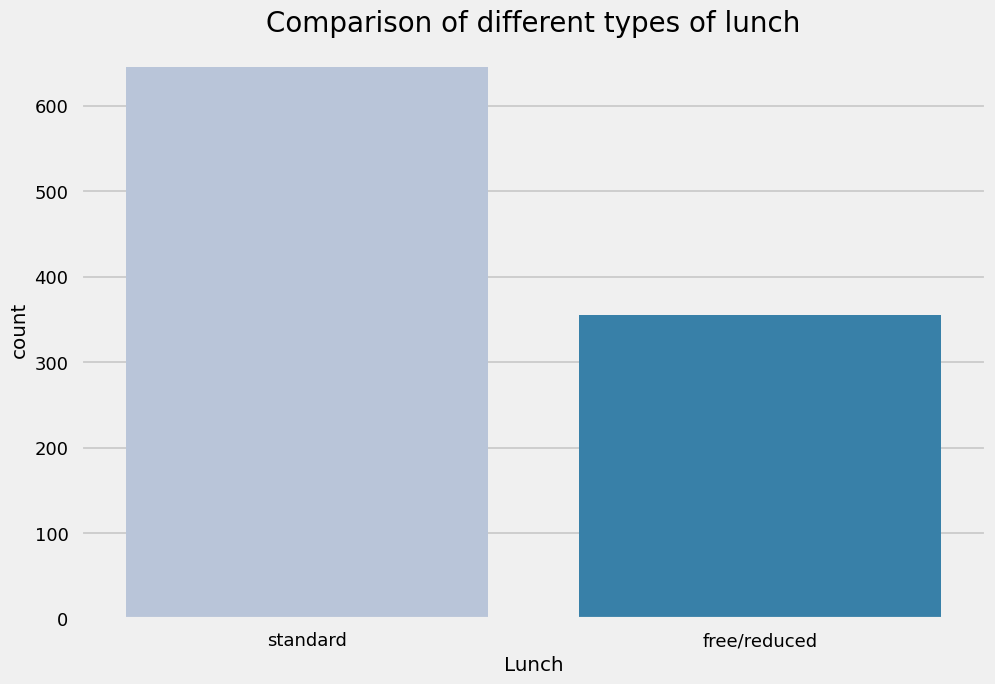

In [44]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('seaborn-talk')
sns.countplot(x=df['lunch'],data=df,palette='PuBu')
plt.xlabel('Lunch')
plt.ylabel('count')
plt.title('Comparison of different types of lunch', fontweight = 30, fontsize = 20)
plt.show()

#### Insights 
- Students being served Standard lunch was more than free lunch

#### BIVARIATE ANALYSIS (  Is lunch type intake has any impact on student's performance ? )

<Axes: title={'center': 'writing_score'}, xlabel='lunch', ylabel='writing_score'>

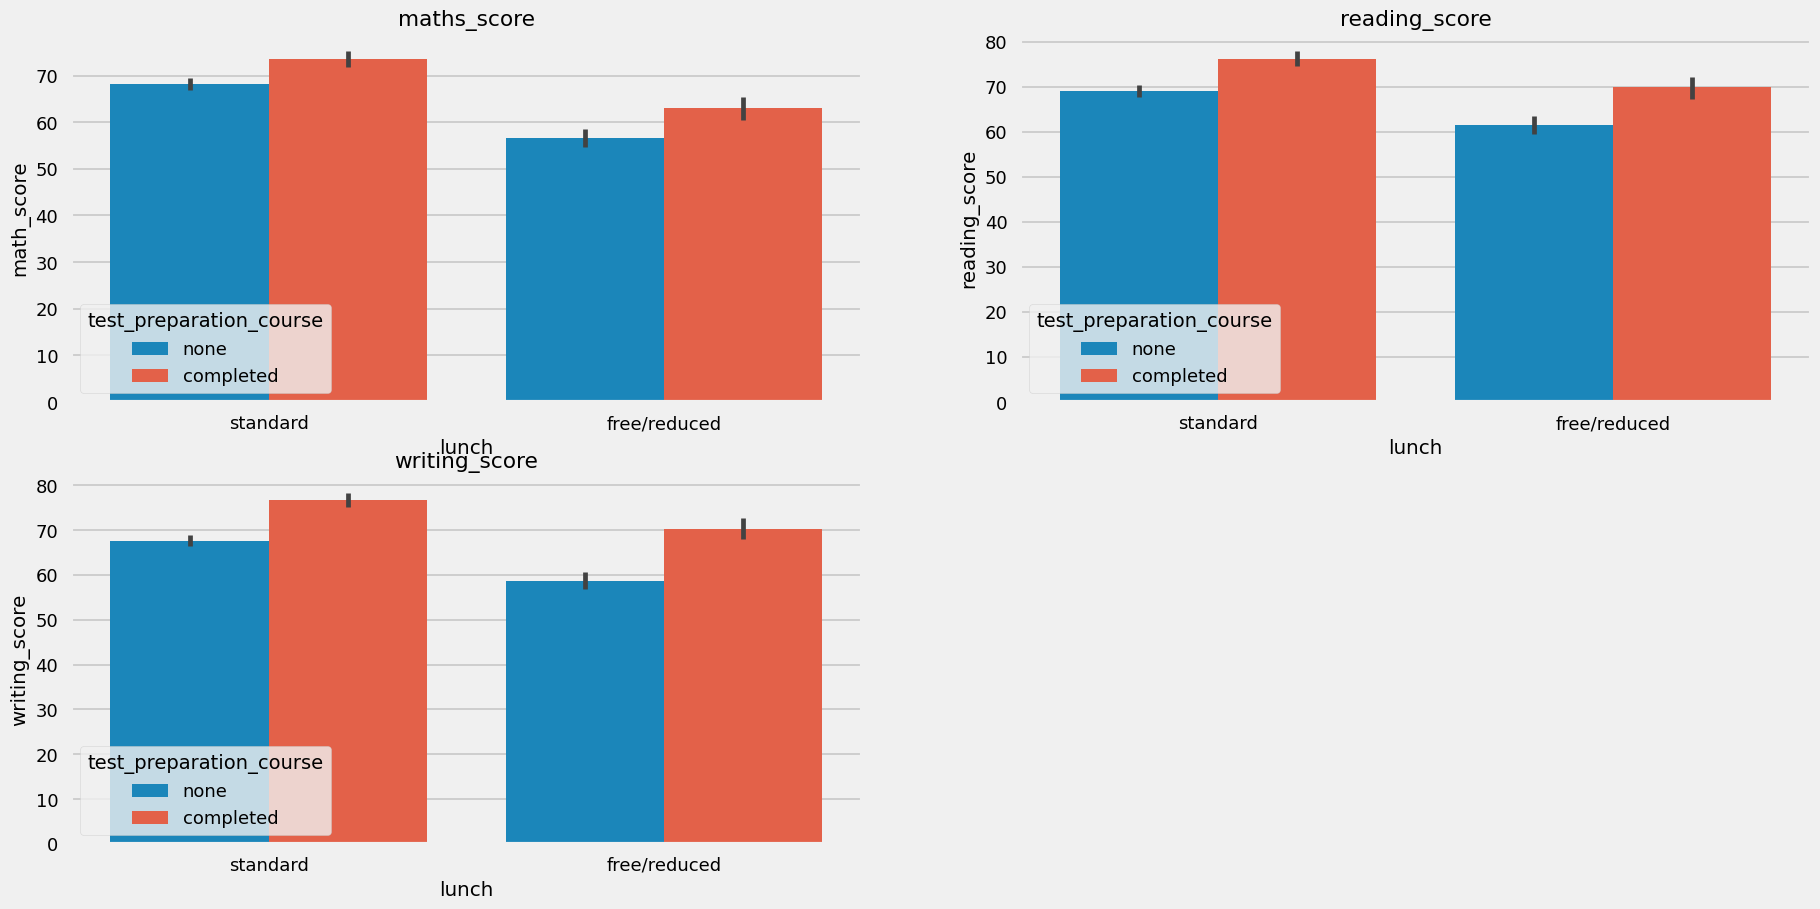

In [45]:
plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
plt.title("maths_score")
sns.barplot (x=df['lunch'], y=df['math_score'],hue=df['test_preparation_course'])
plt.subplot(2,2,2)
plt.title("reading_score")
sns.barplot (x=df['lunch'], y=df['reading_score'], hue=df['test_preparation_course'])
plt.subplot(2,2,3)
plt.title("writing_score")
sns.barplot (x=df['lunch'], y=df['writing_score'], hue=df['test_preparation_course'])

## Checking Outlier

<Axes: ylabel='Average'>

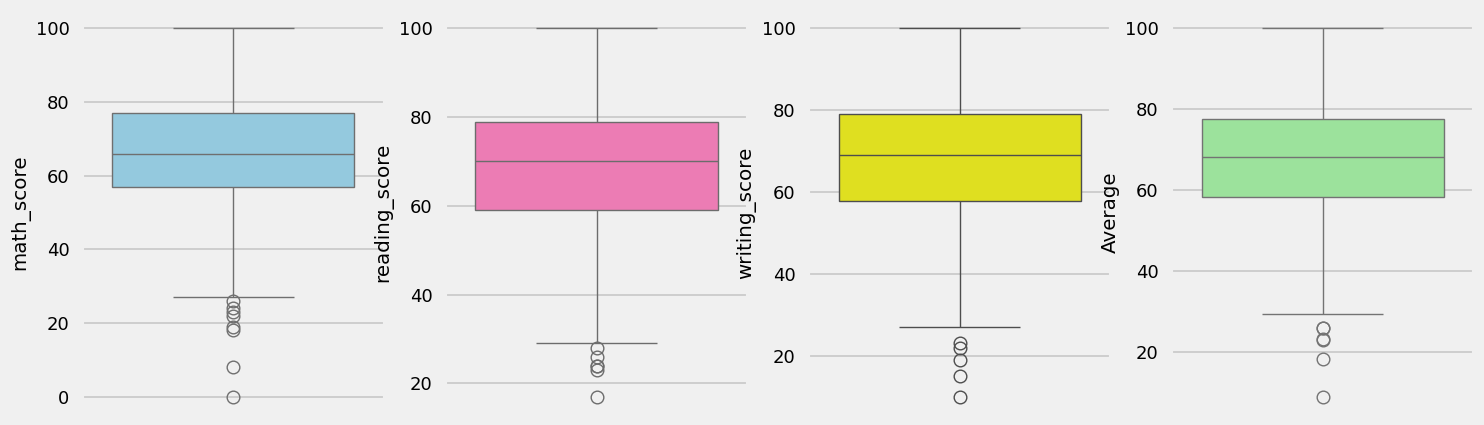

In [51]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['math_score'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading_score'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['writing_score'],color='yellow')
plt.subplot(144)
sns.boxplot(df['Average'],color='lightgreen')

#### 4.4.7 MUTIVARIATE ANALYSIS USING PAIRPLOT

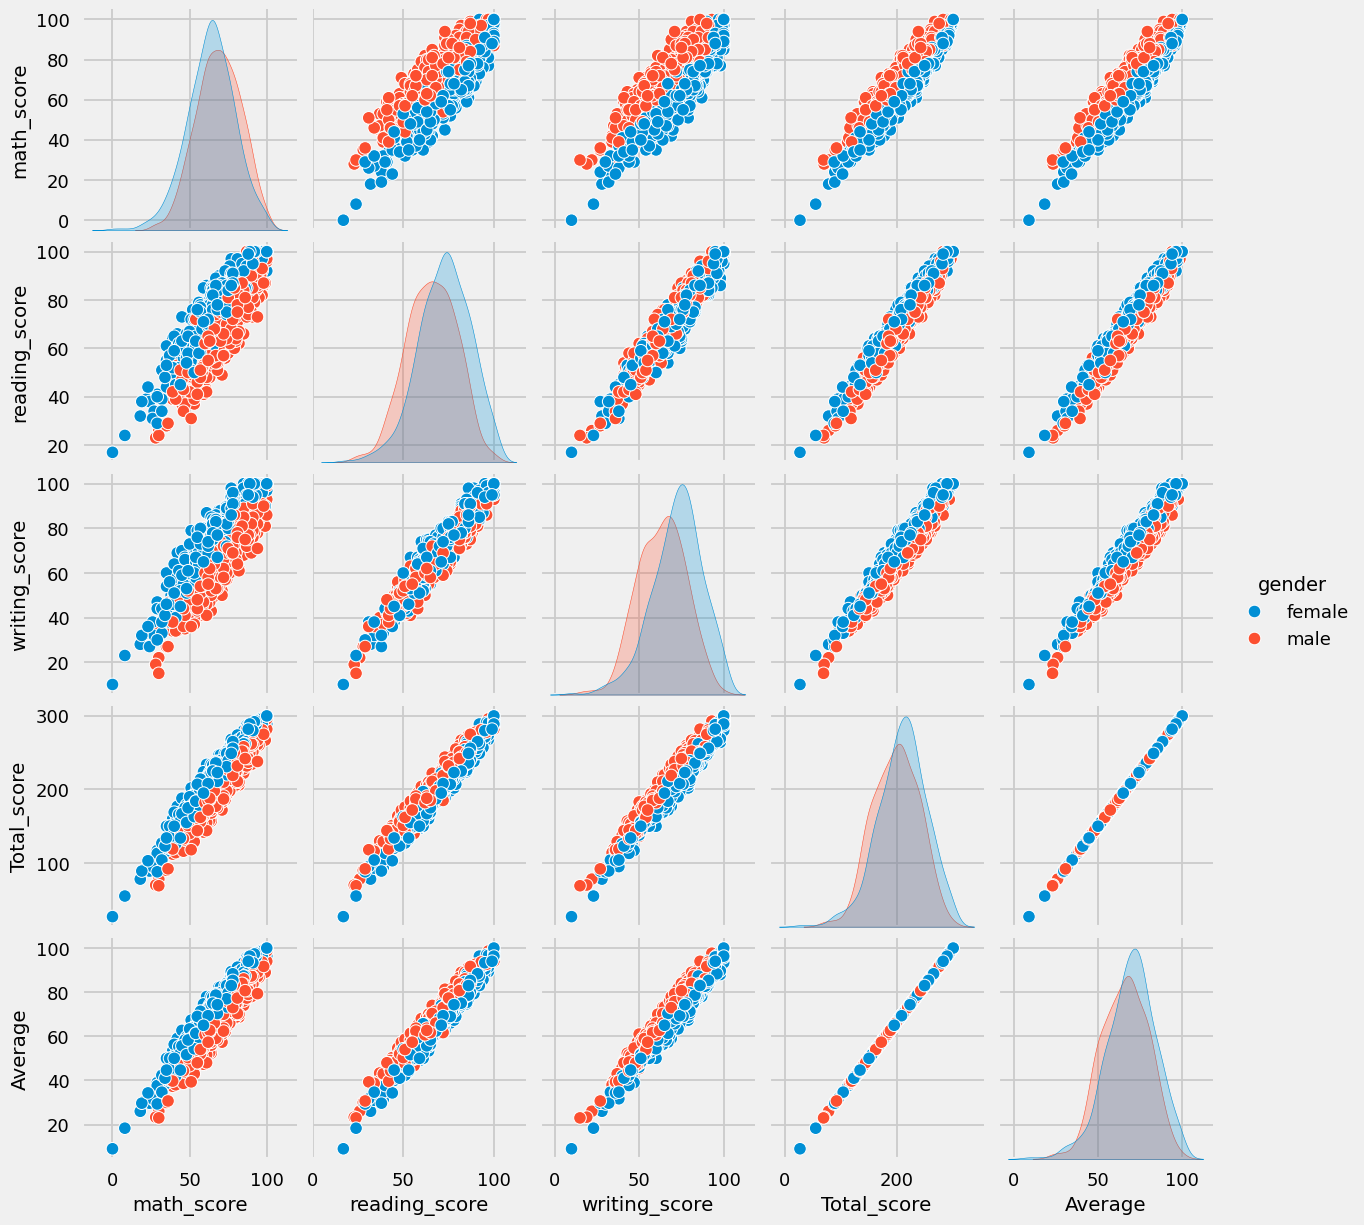

In [55]:
sns.pairplot(df,hue='gender')
plt.show()

#### Insights
- From the above plot it is clear that all the scores increase linearly with each other.

### 5. Conclusions
- Student's Performance is related with lunch, race, parental level education
- Females lead in pass percentage and also are top-scorers
- Student's Performance is not much related with test preparation course
- Finishing preparation course is benefitial.